**Question 1**

The Center on Budget and Policy Priorities reported that average out-of-pocket medical expenses for prescription drugs for privately insured adults with incomes over 200% of the poverty level was $173 in 2002. Suppose an investigation was conducted in 2009 to determine whether the increased availability of generic drugs, Internet prescription drug purchases, and cost controls have reduced out-of-pocket drug expenses. The investigation randomly sampled 196 privately insured adults with incomes over 200% of the poverty level, and the respondents’ 2009 out-of-pocket medical expenses for prescription drugs were recorded. These data are in the file Drug Expenses. Based on the sample data, can it be concluded that 2009 out-of-pocket prescription drug expenses are lower than the 2002 average reported by the Center on Budget and Policy Priorities? Use a level of significance of 0.01 to conduct the hypothesis test.

**Summarize**

- Population parameter is mean, that is the out-of-pocket prescription drug expenses
- Null Hypothesis: Out-of-pocket prescription drug expenses are >= than $173 
- Alternative Hypothesis: Out-of-pocket prescription drug expenses < $173 (claim)
- Based on the statement given, this is a one side or one tailed test
- Level of significance is 99%
- Alpha value is at 0.01

In [1]:
# import all relevant python libraries

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
from scipy.stats import norm
from scipy.stats import kstest                         
from scipy.stats import ttest_1samp                     

In [2]:
# checking the dataset

de = pd.read_excel("DrugExpenses.xlsx", sheet_name="Data", usecols=[1], header=0)   # they are undefine features appear when file being load, use usecols arg to retrive certain columns
print(de.head(5), "\n")
print(de.dtypes, "\n")
print(de.shape, "\n")
print(de.isnull().sum())

   Out-Of-Pocket Drug Expenses
0                       200.31
1                       143.38
2                       164.43
3                       179.59
4                       199.88 

Out-Of-Pocket Drug Expenses    float64
dtype: object 

(196, 1) 

Out-Of-Pocket Drug Expenses    0
dtype: int64


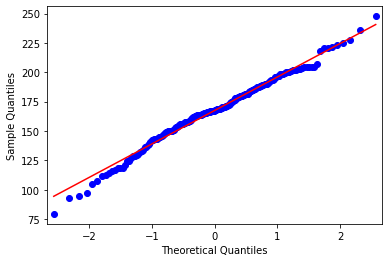

In [3]:
# perform visual normality test

qqplot(de['Out-Of-Pocket Drug Expenses'], line='s')
plt.show()

In [4]:
# perform numerical normality test
# using the Kolmogorov Smirnov Test, sample size more than 50 

confidence_level = 0.99                         # specify the confidence level
alpha = (1-confidence_level)                    # calculate alpha

data = de['Out-Of-Pocket Drug Expenses']        # grab variable column
loc, scale = norm.fit(data) 
n = norm(loc=loc, scale=scale)                  # create a normal distribution with loc and s

stats,pvalue=scipy.stats.kstest(data, n.cdf)    # Kolmogorov Smirnov Test, return KS value and P-value
print('Hypothesis Statement')
print('H_null - Data is normally distributed')
print('H_alt - Data is not normally distributed', "\n")
print("Numerical Normality Test Result:")
print('Kolmogorov-Smirnov Statistics=%.3f, p_value=%.3f' % (stats, pvalue), "\n")

if pvalue < alpha:                              # checking the p value either accepting null hypothesis & data distribution
    print('The null hypothesis is rejected') 
    print('Data is NOT NORMALLY distributed') 
else: 
    print('The null hypothesis is accepted') 
    print('Data is NORMALLY distributed')

Hypothesis Statement
H_null - Data is normally distributed
H_alt - Data is not normally distributed 

Numerical Normality Test Result:
Kolmogorov-Smirnov Statistics=0.060, p_value=0.466 

The null hypothesis is accepted
Data is NORMALLY distributed


In [8]:
# proceed to conduct statistical testing using parametric one sample T-Test

print("Hypothesis Statement")
print("Null Hypothesis: Out-of-pocket prescription drug expenses are >= than $173") 
print("Alternative Hypothesis: Out-of-pocket prescription drug expenses < $173 (claim)","\n")

confidence_level= 0.99                                            # specify the confidence level
alpha=(1-confidence_level)                                        # calculate significance level alpha
print('Significance level, α=%.2f '%(alpha))

tstat,pvalue=ttest_1samp(de['Out-Of-Pocket Drug Expenses'],173)   # one sample T-Test, the value 173 is the parameter mean 
print("t Statistic: ",tstat.round(3))
print('P Value (one sided test): %.5f'%(pvalue/2), "\n")          # need to divide by 2 because of 1 tail test

if(pvalue/2)<alpha:                                               # decision on statistical test
    print('The null hypothesis is rejected as P-value is less than α ')
else:
    print('The null hypothesis is accepted as P-value is more than α')

Hypothesis Statement
Null Hypothesis: Out-of-pocket prescription drug expenses are >= than $173
Alternative Hypothesis: Out-of-pocket prescription drug expenses < $173 (claim) 

Significance level, α=0.01 
t Statistic:  -2.69
P Value (one sided test): 0.00388 

The null hypothesis is rejected as P-value is less than α 


In [18]:
Hypo_mean = 173
print("Hypotehsis Mean Value:", Hypo_mean)
print('Mean Value:', de['Out-Of-Pocket Drug Expenses'].mean())

#calculate the mean difference
Mean_Diff = de['Out-Of-Pocket Drug Expenses'].mean() - Hypo_mean
print('Mean Difference Value:',Mean_Diff)

Hypotehsis Mean Value: 173
Mean Value: 167.52076530612248
Mean Difference Value: -5.479234693877515


**Conclusion**

Population parameter is the mean of out-of-pocket prescription drug expenses. Based on the statement given, the hypothesis can be described as follow:

- Null Hypothesis: Out-of-pocket prescription drug expenses are >= than $173 
- Alternative Hypothesis: Out-of-pocket prescription drug expenses < $173 (claim)

This is a one side or one tailed test. Level of significance is 99% so alpha value will be at 0.01. Since the variable is more than 50 samples, Kolmogorov test was tested for normality checking. It was found that the data is normally distributed with a p-value of 0.466. Next, t-test will be used to conduct the hypothesis testing as it only tests on one sample. The p-value is at 0.00388 level of significance, the null hypothesis is rejected as –value is less than alpha.
